# CLIP Usage
- (Image, Text) Contrastive Learning Joint embedding

CLIP (Contrastive Language-Image Pre-training) is a neural network model developed by OpenAI that embeds text and images into a shared vector space, allowing for cross-modal search, zero-shot image classification, and other multimodal applications.

Here's a simplified overview of how CLIP works:

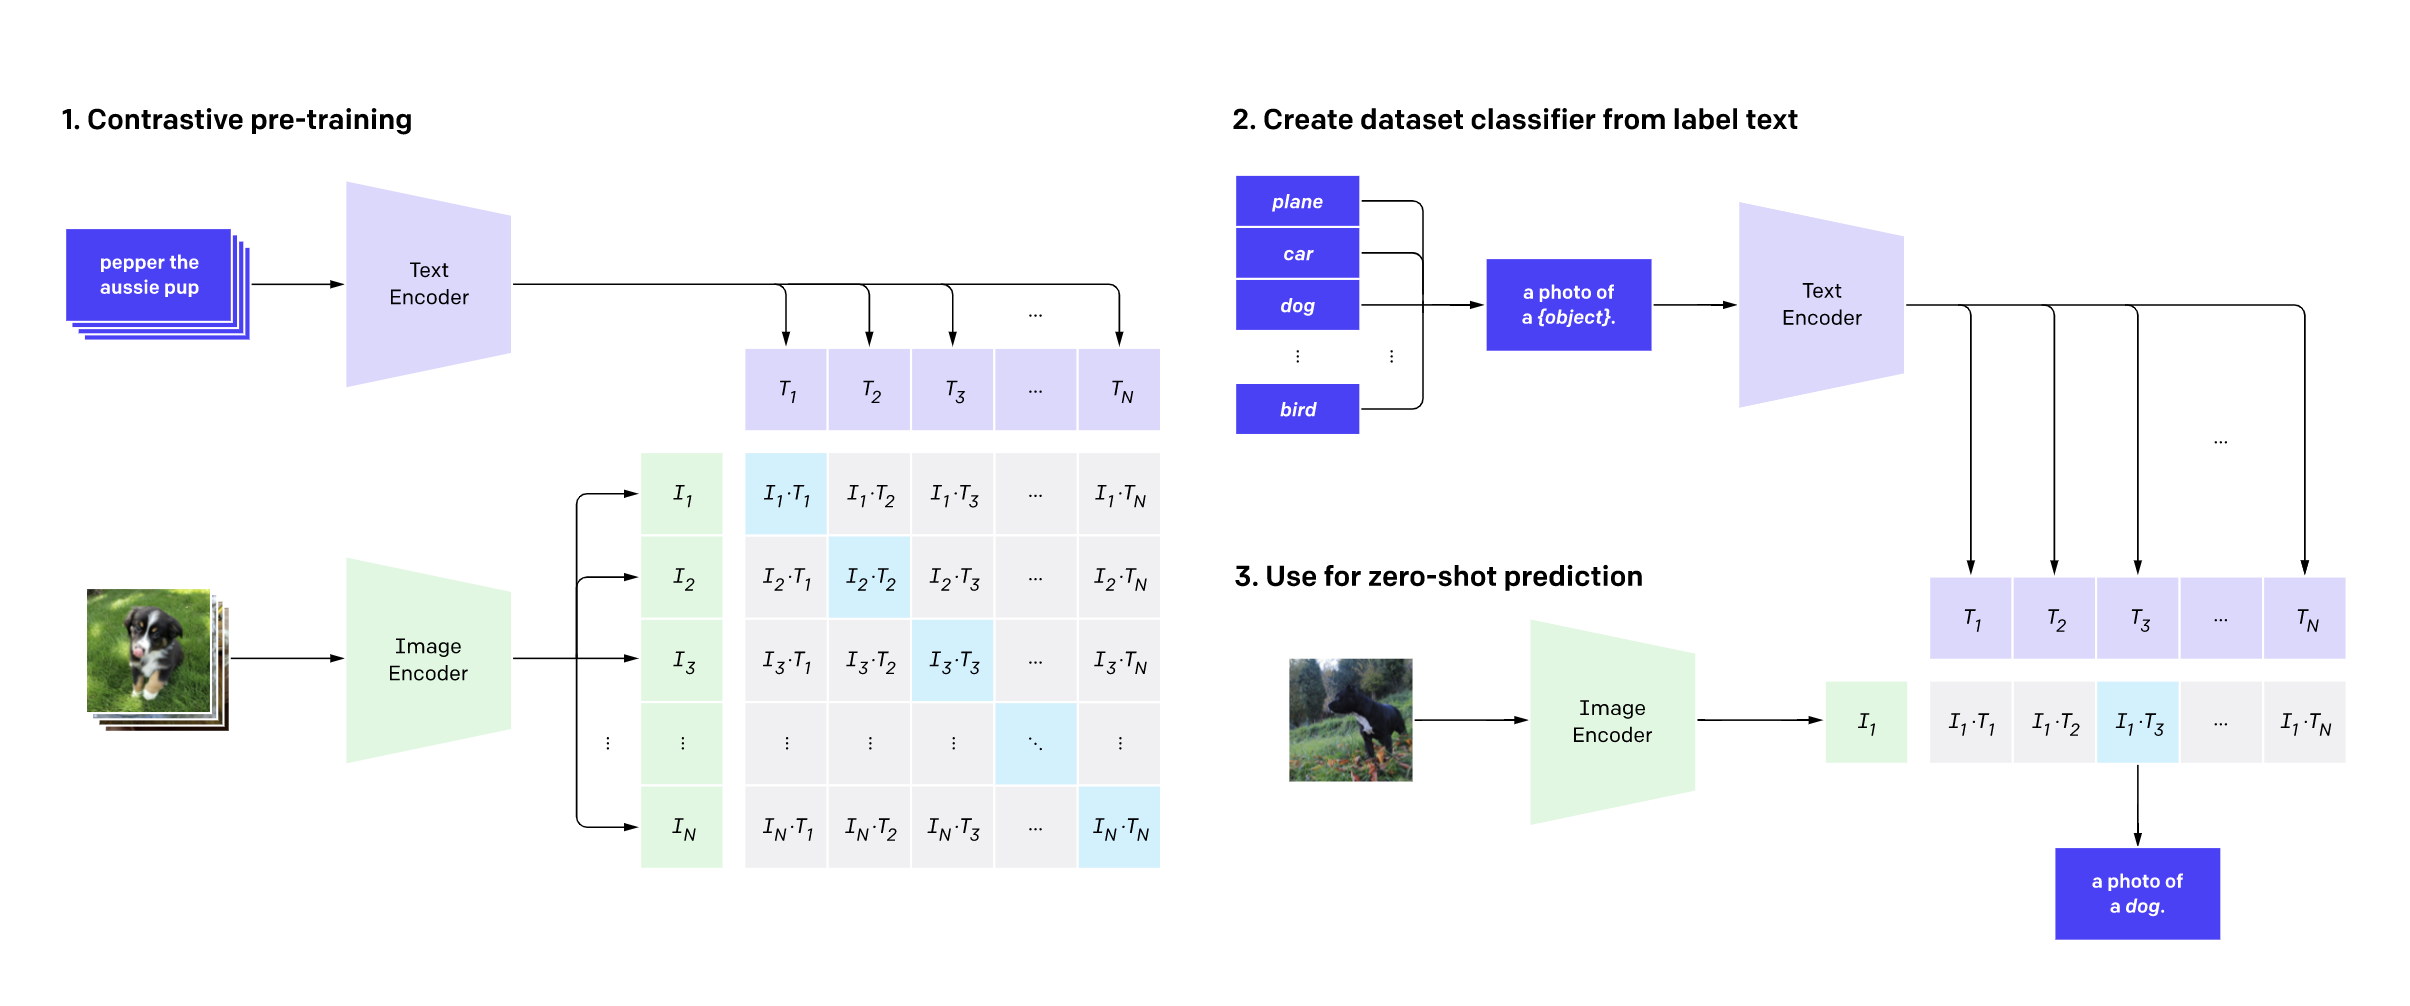

**Text Embedding**:
- Text input (e.g., a sentence or phrase) is tokenized into subwords (smaller units of text).
- The tokenized text is fed into a transformer encoder (a type of neural network architecture).
- The transformer encoder generates a text embedding, a numerical representation of the text.

**Image Embedding**:
- Image input (e.g., a picture) is resized and normalized.
- The image is fed into ViT (Vision Tranformer), thus generates an image embedding, a numerical representation of the image.

**Shared Vector Space**:
- CLIP uses a contrastive learning approach to align the text and image embeddings in a shared vector space.
- The model is trained on a large dataset of image-text pairs, such as images with captions.
- The goal is to maximize the similarity between the text and image embeddings for matching pairs, while minimizing the similarity for non-matching pairs.

**Usage**:
- Once trained, CLIP embed text and images into the shared vector space.
- This allows
    - Zero-shot image classification
    - Cross-modal search

# Via pretrained model

In [1]:
from PIL import Image
import torch
import requests
from transformers import CLIPProcessor, CLIPModel
from matplotlib import pyplot as plt

We initialize the model from HuggingFace. Note that the `processor` includes both the tokenizer and the image processor, which would normally be separate.

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

To demonstrate the model, we download and display an image of cats from the COCO dataset.

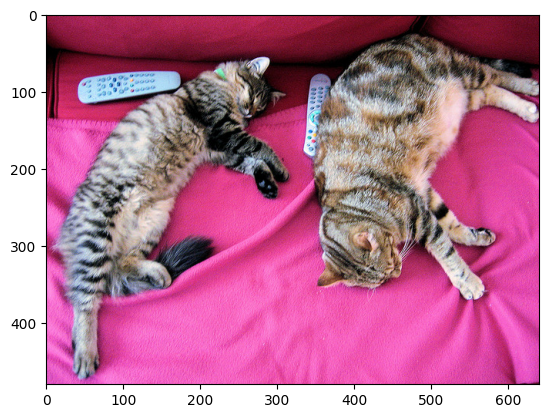

In [3]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

Now we can take this image along with some possible captions, pass it through the processor, and get back the label probabilities from CLIP.

In [4]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
for prob, label in zip(probs[0], ("cat", "dog")):
    print(f"{label}: {prob}")

cat: 0.9948580265045166
dog: 0.005141981411725283


The code above loads the CLIP model and processor, downloads an image of a cat, and runs the image through the model with two different text prompts: "a photo of a cat" and "a photo of a dog". The model outputs a similarity score for each prompt, which is then converted to a probability using softmax. The probabilities are printed out for each label. 

In this case, the model correctly identifies the image as a cat with a higher probability compared to a dog.

## Resources:
* [HF CLIP Usage](https://huggingface.co/docs/transformers/en/model_doc/clip#usage-tips-and-example)